Importing Pandas and numpy

In [1]:
# !pip install pandas
# !pip install numpy
# !pip install sklearn
# !pip install pickle
# !pip install matplotlib

Feading the data

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("IMDB Dataset.csv")
data.dropna()
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
x=data["review"]
y=data["sentiment"]
x,y

(0        One of the other reviewers has mentioned that ...
 1        A wonderful little production. <br /><br />The...
 2        I thought this was a wonderful way to spend ti...
 3        Basically there's a family where a little boy ...
 4        Petter Mattei's "Love in the Time of Money" is...
                                ...                        
 70011    I thought this movie did a down right good job...
 70012    Bad plot, bad dialogue, bad acting, idiotic di...
 70013    I am a Catholic taught in parochial elementary...
 70014    I'm going to have to disagree with the previou...
 70015    No one expects the Star Trek movies to be high...
 Name: review, Length: 70016, dtype: object,
 0        positive
 1        positive
 2        positive
 3        negative
 4        positive
            ...   
 70011    positive
 70012    negative
 70013    negative
 70014    negative
 70015    negative
 Name: sentiment, Length: 70016, dtype: object)

Splitting the data to test and train (80%,20%)


In [5]:

from sklearn.model_selection import train_test_split
X_train,X_test, y_train ,y_test = train_test_split(x,y,train_size=0.8,random_state=2)

Importing Natural Language Toolkit(nltk) to preprocess the String data

In [6]:
#!pip install nltk
from nltk.tokenize import RegexpTokenizer
#for tokexizing the data into
# "my name is"  => ["my","name","is"]

In [7]:
from nltk.stem.porter import PorterStemmer
#cleaning the data like "liking " -> "like"

In [8]:
from nltk.corpus import  stopwords
# to remove the unwanted data like the is

In [9]:
import nltk
nltk.download('stopwords')
# Downloading the stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
#tokenizer with spaceblank
tokenizer = RegexpTokenizer(r"\w+")

en_stopwords = set(stopwords.words('english'))
ps = PorterStemmer()

Creating  function that cleans the data

In [11]:
def getCleanedText(text):
  text = text.lower()
  # tokenizing
  tokens = tokenizer.tokenize(text)
  new_tokens = [token for token in tokens if token not in en_stopwords]
  stemmed_tokens = [ps.stem(tokens) for tokens in new_tokens]
  clean_text = " ".join(stemmed_tokens)
  return clean_text

Working of the fuction

In [12]:
text = "It was a amazing movie, I recommed every one to watch this movie atleast once"
getCleanedText(text)


'amaz movi recom everi one watch movi atleast'

Cleaning the X_train and x_test

In [13]:
# for i in X_train:
#     print(getCleanedText(i))

#X_train cleaning
X_clean = [getCleanedText(i) for i in X_train]
X_clean[1]

'visual film mean dialog spars almost point silent movi long take begin open shot br br silenc howev broken stun sound track rang discord staccato beat haunt mix violin interspers vocal sound like dream feast ear much eye one earli visual man walk along street preoccupi interest shape woman walk lamppost one consequ love metaphor lie store br br long time ago anoth movi love stori 1970 said love never say sorri narr turn idea head number way begin main charact titta toni sevillo seemingli innocu long term resid plush hotel somewher switzerland everyday week week sit coffe tabl enjoy pass world cigarett coffe solitud ten year sit observ week engag three surpris activ find see littl masterpiec br br love explor anoth way direct counterpoint titta solitud reserv natur two older resid hotel still much love man want die spectacular manner time come long suffer wife berat cheat card guest one titta titta know squabbl love man cheat apolog wife whine surpris black comed manner one surpris act

In [14]:
#Y_train cleaning
xt_clean = [getCleanedText(i) for i in X_test]
xt_clean[1]


'great movi whole famili think mani peopl seen caus ask peopl say never heard sophi heyman aunt sister law favorit scene whole movi even pick favorit scene favorit charact hubert funni yet smart dog someon seen miss great adventur seen caus aunt relat sophi got copi someon read suggest buy movi guarante bad decis seen movi five time everi time give messag dog smart peopl give chanc'

Vectorizing the data to array(numbers)
X_train datas

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X_clean)
#X_vec = X_vec

In [16]:
feature_names = vectorizer.get_feature_names_out()
print("Feature names:",  feature_names)

Feature names: ['00' '000' '00000000000' ... 'żmijewski' 'יגאל' 'כרמון']


Vectorizing the X_test data

In [17]:
Xt_vect = vectorizer.transform(xt_clean)
Xt_vect

<14004x65378 sparse matrix of type '<class 'numpy.int64'>'
	with 1318670 stored elements in Compressed Sparse Row format>

Model buildling

In [18]:
y_train

946      positive
56108    positive
48728    positive
65495    negative
42527    negative
           ...   
53922    positive
44295    negative
33867    negative
31019    positive
44566    negative
Name: sentiment, Length: 56012, dtype: object

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_train_encoded = y_train_encoded.reshape(-1,1)
y_train_encoded

array([[1],
       [1],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [20]:
y_test_encoded = le.fit_transform(y_test)
y_test_encoded=y_test_encoded.reshape(-1,1)
y_test_encoded

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [21]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_vec,y_train_encoded)


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
y_pred = reg.predict(Xt_vect)

In [23]:
cmp = pd.DataFrame(y_test_encoded)
cmp["predict"] = y_pred
cmp

,0,predict
0,1,1
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
13999,1,1
14000,1,1
14001,0,0
14002,0,0


In [24]:
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score,precision_score
print(accuracy_score(y_test_encoded,y_pred),mean_squared_error(y_test_encoded,y_pred),r2_score(y_test_encoded,y_pred),precision_score(y_test_encoded,y_pred))


0.9225221365324193 0.07747786346758069 0.6900593145556262 0.918084345961401


Analysising the model 

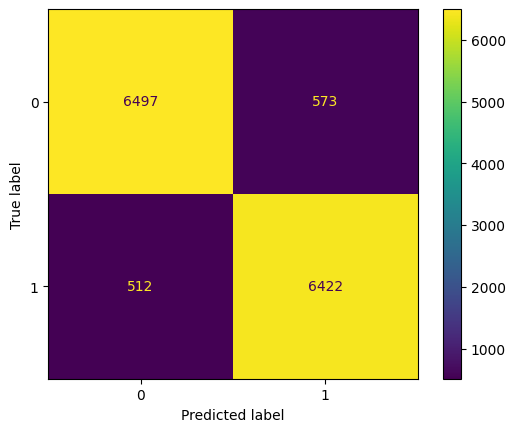

In [25]:
import matplotlib.pyplot as mp
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test_encoded,y_pred)
cm_disp=ConfusionMatrixDisplay(cm)
cm_disp.plot()


Using the another Model MultinomialNB

In [26]:
from sklearn.naive_bayes import MultinomialNB
mn = MultinomialNB()

In [27]:
mn.fit(X_vec, y_train)

MultinomialNB()

In [28]:
y_predt = mn.predict(Xt_vect)
y_predt

array(['positive', 'positive', 'negative', ..., 'negative', 'negative',
       'positive'], dtype='<U8')

In [29]:
accuracy_score(y_predt,y_test)

0.8753213367609255

Accuarcy of both the model <br>
LogisticRegression - 92% <br>
MultinomialNB    - 87%

Dumping the model using Pickle

In [31]:
# Save the vectorizer during training
import pickle
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))
pickle.dump(reg,open('model.pkl','wb'))
